In [28]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
from skimage import io, transform
import matplotlib.pyplot as plt
import random
import os

In [29]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [30]:
# 데이터 불러오기
with_mask = os.listdir("./dataset/with_mask")
without_mask = os.listdir("./dataset/without_mask")

def add_path1(filename):
    return './dataset/with_mask/' + filename
def add_path2(filename):
    return './dataset/without_mask/' + filename

w_mask = list(map(add_path1, with_mask))
wo_mask = list(map(add_path2, without_mask))

In [31]:
# 데이터 preprocessing & label

def dataset(file_list_with, file_list_without,size=(IMAGE_HEIGHT,IMAGE_WIDTH),flattened=False):
    data = []
    labels = []
    for i, file in enumerate(file_list_with):
        if(file =="./dataset/with_mask/.ipynb_checkpoints"):
            continue
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        data.append(image)
        labels.append(1)
    for i, file in enumerate(file_list_without):
        if(file =="./dataset/without_mask/.ipynb_checkpoints"):
            continue
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        data.append(image)
        labels.append(0)
    
    return np.array(data), np.array(labels)

In [32]:
# skimage 의 transform.resize 가 auto scale 되서 나오는듯합니다.
# 0-1 의 범위를 가지고 있습니다.

X, y = dataset(w_mask, wo_mask)
print(X.shape,y.shape)
print(X[0])

(1237, 150, 150, 3) (1237,)
[[[0.12741176 0.13917647 0.15681046]
  [0.1372549  0.14901961 0.16862745]
  [0.1372549  0.14901961 0.16862745]
  ...
  [0.14901961 0.18431373 0.21960784]
  [0.14901961 0.18431373 0.21960784]
  [0.13917647 0.17249673 0.20581699]]

 [[0.12666667 0.13843137 0.15606536]
  [0.1365098  0.14827451 0.16788235]
  [0.1365098  0.14827451 0.16788235]
  ...
  [0.14901961 0.18431373 0.21960784]
  [0.14901961 0.18431373 0.21960784]
  [0.13917647 0.17249673 0.20581699]]

 [[0.12224837 0.13401307 0.15164706]
  [0.1320915  0.14385621 0.16346405]
  [0.1320915  0.14385621 0.16346405]
  ...
  [0.14901961 0.18431373 0.21960784]
  [0.14901961 0.18431373 0.21960784]
  [0.13917647 0.17249673 0.20581699]]

 ...

 [[0.4657854  0.43236645 0.43558214]
  [0.4235732  0.38559935 0.37914771]
  [0.26786601 0.23118736 0.21046841]
  ...
  [0.14117647 0.15294118 0.17254902]
  [0.14117647 0.15294118 0.17254902]
  [0.13133333 0.14112418 0.16073203]]

 [[0.51642092 0.47954915 0.47674771]
  [0.3885

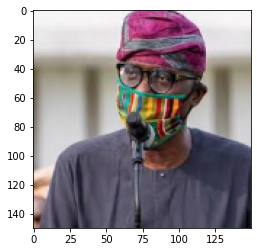

In [33]:
# 데이터 확인하기
sample_1 = random.choice(X)

f = plt.figure()
plt.imshow(sample_1)
plt.show(block=True)

In [34]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, BatchNormalization

In [35]:
def create_model():
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', strides=(2,2), input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
    model.add(Conv2D(64, (3,3), activation='relu',strides=(2,2)))
    model.add(Conv2D(128, (3,3), activation='relu',strides=(2,2)))
    model.add(Conv2D(128, (3,3), activation='relu',strides=(2,2)))
    model.add(Conv2D(256, (3,3), activation='relu',strides=(2,2)))
    model.add(Conv2D(256, (3,3), activation='relu',strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
    return model

In [36]:
model1 = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 256)         590080    
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y)

In [38]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(989, 150, 150, 3) (248, 150, 150, 3) (989,) (248,)


In [39]:
partial_x_train, validation_x_train, partial_y_train, validation_y_train = train_test_split(x_train, y_train, test_size=0.15)

In [40]:
print(partial_x_train.shape,validation_x_train.shape,partial_y_train.shape,validation_y_train.shape)

(840, 150, 150, 3) (149, 150, 150, 3) (840,) (149,)


In [41]:
print('The size of the training set: ',len(x_train))
print('The size of the partial training set: ',len(partial_x_train))
print('The size of the validation training set: ',len(validation_x_train))
print('The size of the testing set: ',len(x_test))

The size of the training set:  989
The size of the partial training set:  840
The size of the validation training set:  149
The size of the testing set:  248


In [42]:
history = model1.fit(
    partial_x_train, 
    partial_y_train,
    validation_data=(validation_x_train, validation_y_train),
    epochs=20, 
    batch_size=32, 
    verbose =1)

Train on 840 samples, validate on 149 samples
Epoch 1/20
840/840 [==============================] - 7s 9ms/sample - loss: 0.7963 - acc: 0.5607 - val_loss: 0.7233 - val_acc: 0.3826
Epoch 2/20
840/840 [==============================] - 7s 8ms/sample - loss: 0.6303 - acc: 0.6655 - val_loss: 0.4527 - val_acc: 0.8322
Epoch 3/20
840/840 [==============================] - 7s 9ms/sample - loss: 0.5993 - acc: 0.7762 - val_loss: 0.5640 - val_acc: 0.7315
Epoch 4/20
840/840 [==============================] - 7s 8ms/sample - loss: 0.4123 - acc: 0.8226 - val_loss: 0.5018 - val_acc: 0.8054
Epoch 5/20
840/840 [==============================] - 8s 10ms/sample - loss: 0.3994 - acc: 0.8298 - val_loss: 0.4513 - val_acc: 0.8322
Epoch 6/20
840/840 [==============================] - 7s 8ms/sample - loss: 0.4133 - acc: 0.8238 - val_loss: 0.4399 - val_acc: 0.7785
Epoch 7/20
840/840 [==============================] - 8s 9ms/sample - loss: 0.3669 - acc: 0.8452 - val_loss: 0.3949 - val_acc: 0.8188
Epoch 8/20
840/

In [43]:
def smooth_curve(points, factor=0.8): #this function will make our plots more smooth
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

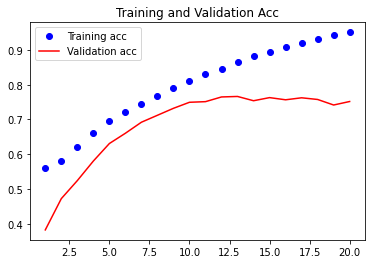

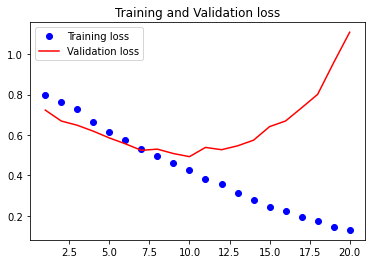

In [45]:
epochs = range(1, len(acc)+1)
plt.plot(epochs, smooth_curve(acc), 'bo', label='Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'r-', label='Validation acc')
plt.legend()
plt.title('Training and Validation Acc')
plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'r-', label='Validation loss')
plt.legend()
plt.title('Training and Validation loss')
plt.show()

In [47]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('The final test accuracy: ',test_acc)

248/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================